In [1]:
# Importing the required libraries

import numpy as np
import matplotlib.pyplot as plt
import scipy.io

from numpy.linalg import inv, pinv, norm

In [2]:
'''
 Function that returns train and test error for the passed inputs
 x-train - input training data
 y-train - output training data
 x-test - input test data
 y-test - output test data
 penalty_lambda - lambda values passed from 1 to 1000
'''
def polyreg(x_train=np.empty(0), y_train=np.empty(0), x_test=np.empty(0), 
            y_test=np.empty(0), penalty_lambda=0):
  # Returning both test and train error as zero if anyone of the parameters 
  # is missing
  if len(x_train) == 0 or len(y_train) == 0 or len(x_test) == 0 or len(
      y_test) == 0:
      print('Training or Test data missing')
      return 0,0
  
  # Calculating theta by incorporating lambda as well
  x_train_transpose = np.transpose(x_train)
  x_train_transpose_x_train = np.matmul(x_train_transpose, x_train)
  penalty_matrix = penalty_lambda * np.identity(x_train.shape[-1])
  x_train_transpose_x_train_penalty = x_train_transpose_x_train + penalty_matrix
  theta      = np.matmul(np.matmul(inv(x_train_transpose_x_train_penalty), 
                                   np.transpose(x_train)), y_train)
  
  # Taking norm of the theta  
  theta_norm = norm(theta)

  # Calculating training error 
  samples_count_train = x_train.shape[0]
  y_pred_train = np.matmul(x_train, theta)
  train_error  = round((np.sum(np.power(y_train-y_pred_train,2)) +  
                penalty_lambda * (theta_norm ** 2)) * (
                    0.5 / samples_count_train), 2)

  # Calculating test error
  samples_count_test = x_test.shape[0]
  y_pred_train = np.matmul(x_test, theta)
  test_error   = round((np.sum(np.power(y_test-y_pred_train,2))  +  
                penalty_lambda * (theta_norm ** 2)) * (
                    0.5 / samples_count_test), 2)

  return train_error, test_error


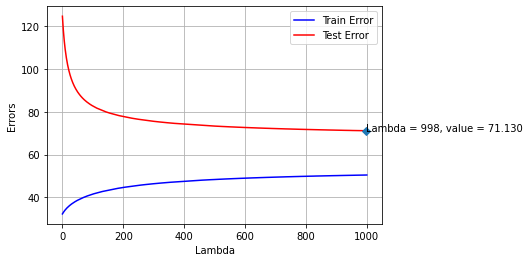

In [3]:
# Loading .mat file
matlab_data = scipy.io.loadmat('problem2.mat')
x_input = matlab_data['x']
y_output = matlab_data['y']

# Shuffling the data
np.random.shuffle(x_input)
                     
# Dividing input and output data in two halves as train and test data 
test_size = int(x_input.shape[0] * 0.5)
x_train, x_test = x_input[:test_size], x_input[test_size:]
y_train, y_test = y_output[:test_size], y_output[test_size:]

# Lambda values to be checked are from 1 to 1000 (Both included)
max_lambda_limit = 1000
train_errors_list,test_errors_list = [],[]
for penalty_lambda in range(0, max_lambda_limit + 1):
  train_error,test_error = polyreg(x_train=x_train, y_train=y_train, 
                                   x_test=x_test, y_test=y_test, 
                                   penalty_lambda=penalty_lambda)
  train_errors_list.append(train_error)
  test_errors_list.append(test_error)

# Index and Min value of test error is stored from the train_errors_list
min_test_error_value = min(test_errors_list)
min_test_error_index = test_errors_list.index(min_test_error_value)

# Plotting Train Error and Test Error graphs for different 
# degree(Cross Validation) and plotting the point with least Test error
plt.plot(range(0,max_lambda_limit+1), train_errors_list,'b',label='Train Error')
plt.plot(range(0,max_lambda_limit+1), test_errors_list, 'r',label='Test Error')
plt.plot(min_test_error_index, min_test_error_value, 'D')
plt.text(min_test_error_index, min_test_error_value, 
         "Lambda = {0}, value = {1}".format(min_test_error_index, 
                                            '%.3f'%min_test_error_value))
plt.xlabel('Lambda')
plt.ylabel('Errors')
plt.legend()
plt.grid()
plt.show()
